Path found: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (11, 1), (12, 1), (12, 2), (12, 3), (12, 4), (13, 4), (14, 4), (14, 5), (15, 5), (15, 6), (16, 6), (17, 6), (18, 6), (18, 7), (18, 8), (19, 8), (20, 8), (21, 8), (22, 8), (23, 8), (23, 9), (24, 9), (25, 9), (26, 9), (27, 9), (27, 10), (27, 11), (28, 11), (28, 12), (28, 13), (29, 13), (29, 14), (30, 14), (30, 15), (31, 15), (31, 16), (32, 16), (32, 17), (33, 17), (34, 17), (34, 18), (34, 19), (35, 19), (36, 19), (36, 20), (37, 20), (37, 21), (38, 21), (38, 22), (39, 22), (40, 22), (41, 22), (42, 22), (42, 23), (43, 23), (43, 24), (44, 24), (45, 24), (46, 24), (47, 24), (48, 24), (49, 24), (49, 25), (50, 25), (51, 25), (51, 26), (52, 26), (52, 27), (52, 28), (53, 28), (53, 29), (54, 29), (55, 29), (55, 30), (55, 31), (55, 32), (55, 33), (55, 34), (55, 35), (56, 35), (57, 35), (58, 35), (58, 36), (58, 37), (58, 38), (59, 38), (59, 39), (59, 40), (59, 41), (59, 42), (59, 43), (59,

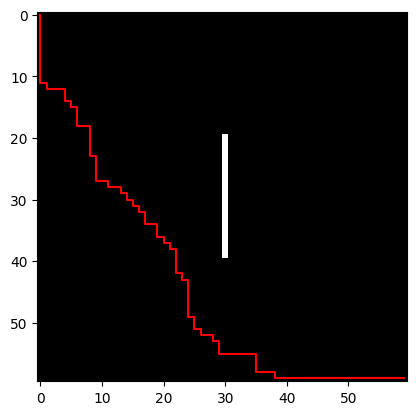

In [21]:
import heapq


GRID_SIZE = 60

DIRECTIONS = [(0, 1), (1, 0), (0, -1), (-1, 0)]

class Node:
    def __init__(self, position, parent=None, g=0, h=0):
        self.position = position
        self.parent = parent
        self.g = g
        self.h = h
        self.f = g + h

    def __lt__(self, other):
        return self.f < other.f

def heuristic(a, b):

    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def astar(maze, start, end):
    open_list = []
    heapq.heappush(open_list, Node(start, None, 0, heuristic(start, end)))


    closed_set = set()

    while open_list:
        current_node = heapq.heappop(open_list)
        if current_node.position == end:
            path = []
            while current_node:
                path.append(current_node.position)
                current_node = current_node.parent
            return path[::-1]

        closed_set.add(current_node.position)

        for direction in DIRECTIONS:
            neighbor_pos = (current_node.position[0] + direction[0], current_node.position[1] + direction[1])

            if 0 <= neighbor_pos[0] < GRID_SIZE and 0 <= neighbor_pos[1] < GRID_SIZE and maze[neighbor_pos[0]][neighbor_pos[1]] == 0:
                if neighbor_pos in closed_set:
                    continue

                g_cost = current_node.g + 1
                h_cost = heuristic(neighbor_pos, end)
                neighbor_node = Node(neighbor_pos, current_node, g_cost, h_cost)

                heapq.heappush(open_list, neighbor_node)

    return None
maze = [[0 for _ in range(GRID_SIZE)] for _ in range(GRID_SIZE)]

for i in range(20, 40):
    maze[i][30] = 1
start = (0, 0)
end = (59, 59)

path = astar(maze, start, end)

if path:
    print("Path found:", path)
    visualize_maze(maze, path)
else:
    print("No path found")

import matplotlib.pyplot as plt
import numpy as np

def visualize_maze(maze, path):
    maze_array = np.array(maze)
    plt.imshow(maze_array, cmap='gray')
    if path:
        path = np.array(path)
        plt.plot(path[:, 1], path[:, 0], color='red')
    plt.show()



In [19]:

maze = [
    [0, 1, 0, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 0, 1, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0]
]


In [20]:
class Node:
    def __init__(self, position, parent=None):
        self.position = position
        self.parent = parent
        self.g = 0
        self.h = 0
        self.f = 0

    def __lt__(self, other):
        return self.f < other.f



In [9]:
import heapq

def a_star(maze, start, goal):
    open_list = []
    closed_list = set()
    start_node = Node(start)
    goal_node = Node(goal)
    heapq.heappush(open_list, (start_node.f, start_node))

    while open_list:
        current_node = heapq.heappop(open_list)[1]
        closed_list.add(current_node.position)

        if current_node.position == goal_node.position:
            path = []
            while current_node:
                path.append(current_node.position)
                current_node = current_node.parent
            return path[::-1]

        neighbors = get_neighbors(maze, current_node.position)
        for neighbor in neighbors:
            if neighbor in closed_list:
                continue
            neighbor_node = Node(neighbor, current_node)
            neighbor_node.g = current_node.g + 1
            neighbor_node.h = heuristic(neighbor, goal)
            neighbor_node.f = neighbor_node.g + neighbor_node.h
            heapq.heappush(open_list, (neighbor_node.f, neighbor_node))

    return None

def get_neighbors(maze, position):
    x, y = position
    neighbors = []
    for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
        nx, ny = x + dx, y + dy
        if 0 <= nx < len(maze) and 0 <= ny < len(maze[0]) and maze[nx][ny] == 0:
            neighbors.append((nx, ny))
    return neighbors

def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])


In [14]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_maze(maze, path):
    maze_array = np.array(maze)
    plt.imshow(maze_array, cmap='gray')
    if path:
        path = np.array(path)
        plt.plot(path[:, 1], path[:, 0], color='red')
    plt.show()


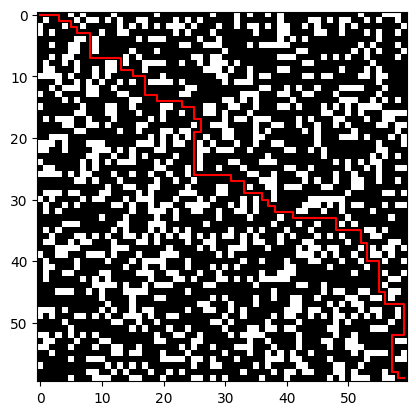

In [15]:
import numpy as np

def generate_maze(size):
    maze = np.random.choice([0, 1], size=size, p=[0.7, 0.3])
    maze[0, 0] = 0
    maze[size[0] - 1, size[1] - 1] = 0
    return maze.tolist()

def main():
    size = (60, 60)
    maze = generate_maze(size)
    start = (0, 0)
    goal = (size[0] - 1, size[1] - 1)
    path = a_star(maze, start, goal)
    visualize_maze(maze, path)

if __name__ == "__main__":
    main()
